# FLISoL/Bagé 2023      
Notebook da palestra "Python para finanças: explorando dados financeiros!".         
Link de acesso: [https://www.youtube.com/watch?v=j1sINO0WoGY](https://www.youtube.com/watch?v=j1sINO0WoGY)


## Bibliotecas usadas na área financeira

In [72]:
# Exemplo: Bibliotecas Python usadas na área financeira - pandas

import pandas as pd

url = 'https://raw.githubusercontent.com/apusdigital/flisol-2023/main/datasets/AAPL.csv'

# Carrega os dados do arquivo CSV
df = pd.read_csv(url, index_col = 'Date', parse_dates = True)

# Calcula os retornos diários
df['Return'] = df['Close'].pct_change()

# Calcula o retorno diário médio
daily_return_mean = df['Return'].mean()
print('Retorno diário médio:', daily_return_mean)

# Calcula a volatilidade histórica
daily_volatility = df['Return'].std()
print('Volatilidade histórica:', daily_volatility)

Retorno diário médio: -0.004700511517994327
Volatilidade histórica: 0.012989624617195269


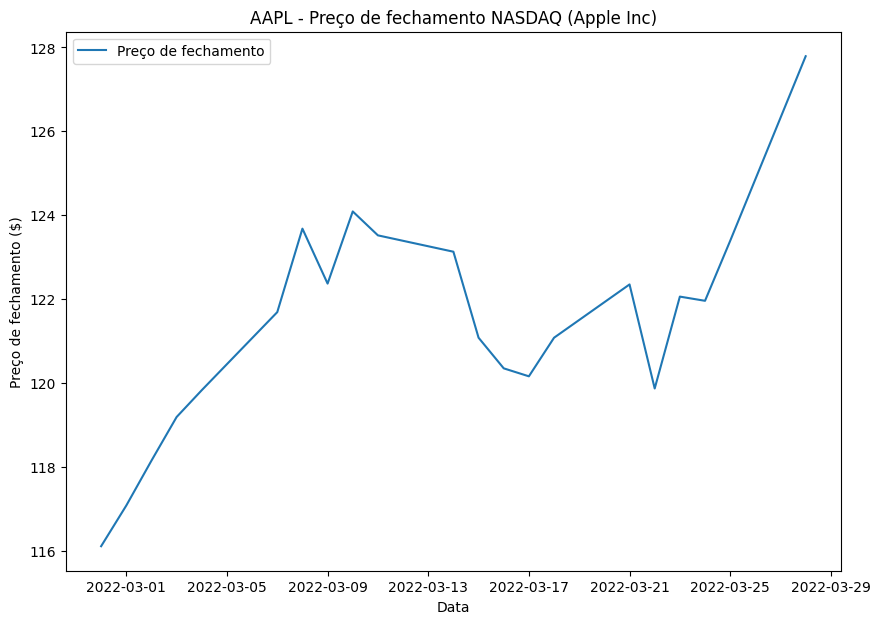

In [73]:
# Exemplo: Bibliotecas Python usadas na área financeira - matplotlib

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/apusdigital/flisol-2023/main/datasets/AAPL.csv'

# Carrega os dados do arquivo CSV
df = pd.read_csv(url, index_col = 'Date', parse_dates = True)

# Cria um gráfico de linhas
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df.index, df['Close'], label = 'Preço de fechamento')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento ($)')
ax.set_title('AAPL - Preço de fechamento NASDAQ (Apple Inc)')
ax.legend()

# Mostra o gráfico
plt.show()

In [74]:
# Exemplo: Bibliotecas Python usadas na área financeira - yfinance

import yfinance as yf

# Obter dados da ação AAPL
stock = yf.Ticker('AAPL')

# Obter informações gerais sobre a ação
info = stock.info

# Imprimir informações sobre a ação
print(info['symbol'])
print(info['country'])
print(info['currency'])
print('\n')

# Obter o histórico de dividendos 
dividendos = stock.dividends

# Imprimir o histórico de dividendos (data e %)
print(dividendos)

AAPL
United States
USD


Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-02-04 00:00:00-05:00    0.220000
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
Name: Dividends, Length: 78, dtype: float64


In [75]:
# Exemplo: Coleta de dados - yfinance

import yfinance as yf
import pandas as pd

# Lista de ações a serem analisadas
tickers = ['AAPL', 'MSFT', 'AMZN']

# Data de início e fim da coleta de dados
start_date = '2019-01-01'
end_date = '2023-04-15'

# Coleta de dados
data = yf.download(tickers, start = start_date, end = end_date)['Close']

# Renomear colunas com os nomes das ações
data.columns = tickers

# Visualização dos dados coletados (últimos 5 valores)
print(data.head())

[*********************100%***********************]  3 of 3 completed
                 AAPL       MSFT        AMZN
Date                                        
2019-01-02  39.480000  76.956497  101.120003
2019-01-03  35.547501  75.014000   97.400002
2019-01-04  37.064999  78.769501  101.930000
2019-01-07  36.982498  81.475502  102.059998
2019-01-08  37.687500  82.829002  102.800003


## Coleta de dados de websites

In [76]:
# Exemplo: Coleta de dados - BeautifulSoup

import requests
from bs4 import BeautifulSoup

# Define a URL do site de onde queremos extrair os dados
url = 'https://finance.yahoo.com/quote/AAPL?p=AAPL'

# Faz a requisição HTTP para a URL e obtém o conteúdo da página
response = requests.get(url)
html_content = response.content

# Cria um objeto BeautifulSoup com o conteúdo da página
soup = BeautifulSoup(html_content, 'html.parser')

# Extrai o preço atual da ação da Apple (AAPL) e exibe na tela
price_element = soup.find('fin-streamer', {'class': 'Fw(b) Fz(36px) Mb(-4px) D(ib)'})

# Imprime o elemento completo
print(price_element)

# Imprime somente o preco atual da ação
price = price_element.text
print('Preço da ação da Apple (AAPL):', price)

<fin-streamer active="" class="Fw(b) Fz(36px) Mb(-4px) D(ib)" data-field="regularMarketPrice" data-pricehint="2" data-symbol="AAPL" data-test="qsp-price" data-trend="none" value="164.76">164.76</fin-streamer>
Preço da ação da Apple (AAPL): 164.76


## Visualização de dados interativa   

In [77]:
# Exemplo: Visualização de dados - plotly

import yfinance as yf
import plotly.graph_objs as go

# Define as ações que queremos visualizar
tickers = ['AAPL', 'GOOG', 'MSFT']

# Define o intervalo de datas para o qual queremos obter os dados
start_date = '2019-01-01'
end_date = '2023-04-15'

# Obtém os dados das ações utilizando o yfinance
data = yf.download(tickers, start = start_date, end = end_date)['Adj Close']

# Cria um gráfico interativo com o plotly
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(x = data.index, y = data[ticker], name = ticker, line = dict(width = 2),))

fig.update_layout(
    title = 'Preços das ações',
    xaxis_title = 'Data',
    yaxis_title = 'Preço (USD)',
    xaxis_rangeslider_visible = True,
    height = 600,
)

fig.show()

[*********************100%***********************]  3 of 3 completed


## Modelagem financeira  

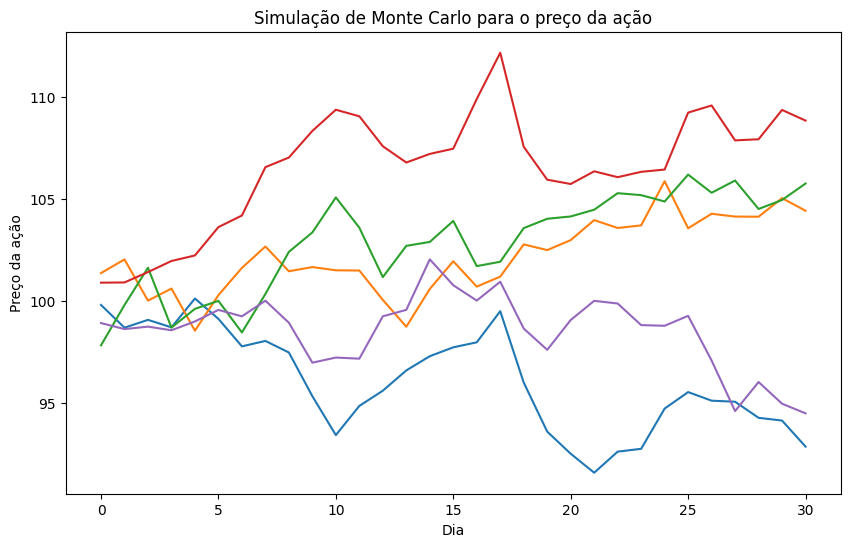

In [78]:
# Exemplo: Modelagem financeira com simulações de Monte Carlo - matplotlib

# Método estatístico usado para estimar a probabilidade de diferentes resultados 
# em um processo que envolve aleatoriedade ou incerteza. 

import numpy as np
import matplotlib.pyplot as plt

# Define os parâmetros da simulação
S = 100  # Preço inicial da ação
mu = 0.1  # Retorno médio diário
sigma = 0.2  # Volatilidade diária
dt = 1/252  # Intervalo de tempo (um dia)

# Define o número de simulações e o número de dias a serem simulados
num_simulacoes = 5
num_dias = 31

# Gera uma matriz com números aleatórios normalmente distribuídos
# (correspondentes aos retornos diários da ação)
r = np.random.normal((mu*dt), (sigma*np.sqrt(dt)), (num_dias, num_simulacoes))

# Calcula o preço da ação para cada simulação e cada dia
preco = S * np.exp(np.cumsum(r, axis = 0))

# Plota o gráfico das simulações de Monte Carlo
plt.figure(figsize = (10, 6))
plt.plot(preco)
plt.xlabel('Dia')
plt.ylabel('Preço da ação')
plt.title('Simulação de Monte Carlo para o preço da ação')
plt.show()

## Recursos do Google Colab

In [79]:
# Exemplo: Código Python para finanças – Recursos do Google Colab
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12093305791588015817
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6818055302985346933
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [80]:
!cat /proc/meminfo

MemTotal:       13297184 kB
MemFree:         6720420 kB
MemAvailable:   10622600 kB
Buffers:          342112 kB
Cached:          3728412 kB
SwapCached:            0 kB
Active:           652564 kB
Inactive:        5511480 kB
Active(anon):       1700 kB
Inactive(anon):  2079136 kB
Active(file):     650864 kB
Inactive(file):  3432344 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1028 kB
Writeback:            84 kB
AnonPages:       2093792 kB
Mapped:           763104 kB
Shmem:             12744 kB
KReclaimable:     121104 kB
Slab:             164532 kB
SReclaimable:     121104 kB
SUnreclaim:        43428 kB
KernelStack:        4496 kB
PageTables:        30552 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648592 kB
Committed_AS:    3996236 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       76960 kB
VmallocChunk:          0 kB
Percpu:          

## Estudo de caso

In [81]:
# Exemplo: Código Python para finanças – Estudo de caso

# importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr # pandas data reader
import yfinance as yf
yf.pdr_override() # fix TypeError: string indices must be integers
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # gráficos interativos

In [82]:
# BASE DE DADOS COM UMA AÇÃO - preço das ações online

# lê os dados online do yahoo finance com base no ticker da ação
acao_df = pdr.get_data_yahoo('MGLU3.SA', start = '2011-01-01', end = '2023-04-15')

# exibe o dataframe pesquisado 
print(acao_df)

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2011-05-02  0.503125  0.518750  0.503125  0.514062   0.463173  280003200
2011-05-03  0.515625  0.521562  0.506250  0.509375   0.458950   33670400
2011-05-04  0.510000  0.515000  0.510000  0.515000   0.464018   39203200
2011-05-05  0.512812  0.512812  0.510000  0.511875   0.461202   35097600
2011-05-06  0.510937  0.511875  0.500000  0.508125   0.457824   38672000
...              ...       ...       ...       ...        ...        ...
2023-04-10  3.390000  3.450000  3.350000  3.350000   3.350000   56053800
2023-04-11  3.460000  3.870000  3.450000  3.780000   3.780000  244432900
2023-04-12  3.880000  3.930000  3.770000  3.880000   3.880000  152501900
2023-04-13  3.890000  3.970000  3.780000  3.860000   3.860000   97397100
2023-04-14  3.810000  3.850000  3.730000  3.760000   3.

In [83]:
# informações sobre a base de dados
print(acao_df.info()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2970 entries, 2011-05-02 to 2023-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2970 non-null   float64
 1   High       2970 non-null   float64
 2   Low        2970 non-null   float64
 3   Close      2970 non-null   float64
 4   Adj Close  2970 non-null   float64
 5   Volume     2970 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 162.4 KB
None


In [84]:
# mostra os primeiros registros
print(acao_df.head(3))

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2011-05-02  0.503125  0.518750  0.503125  0.514062   0.463173  280003200
2011-05-03  0.515625  0.521562  0.506250  0.509375   0.458950   33670400
2011-05-04  0.510000  0.515000  0.510000  0.515000   0.464018   39203200


In [85]:
# mostra os últimos registros
print(acao_df.tail(3))

            Open  High   Low  Close  Adj Close     Volume
Date                                                     
2023-04-12  3.88  3.93  3.77   3.88       3.88  152501900
2023-04-13  3.89  3.97  3.78   3.86       3.86   97397100
2023-04-14  3.81  3.85  3.73   3.76       3.76   68279900


In [86]:
# exibe algumas estatísticas
print(acao_df.describe()['Close'])

count    2970.000000
mean        4.704977
std         6.912709
min         0.030585
25%         0.268515
50%         0.868691
75%         5.593359
max        27.450001
Name: Close, dtype: float64


In [87]:
# analisa o valor de fechamento
print(acao_df[acao_df['Close'] >= 27])   

                 Open       High    Low      Close  Adj Close    Volume
Date                                                                   
2020-11-05  26.879999  27.700001  26.74  27.450001  27.401571  46382700
2020-11-06  27.000000  27.360001  26.51  27.330000  27.281780  33294500


In [88]:
# converte o index 'Date' do dataframe em coluna
acao_df.reset_index(inplace = True)
print(acao_df.head())

        Date      Open      High       Low     Close  Adj Close     Volume
0 2011-05-02  0.503125  0.518750  0.503125  0.514062   0.463173  280003200
1 2011-05-03  0.515625  0.521562  0.506250  0.509375   0.458950   33670400
2 2011-05-04  0.510000  0.515000  0.510000  0.515000   0.464018   39203200
3 2011-05-05  0.512812  0.512812  0.510000  0.511875   0.461202   35097600
4 2011-05-06  0.510937  0.511875  0.500000  0.508125   0.457824   38672000


In [89]:
# seleciona somente as colunas 'Date' e 'Close' do DataFrame
acao_df = acao_df[['Date', 'Close']]
print(acao_df)

           Date     Close
0    2011-05-02  0.514062
1    2011-05-03  0.509375
2    2011-05-04  0.515000
3    2011-05-05  0.511875
4    2011-05-06  0.508125
...         ...       ...
2965 2023-04-10  3.350000
2966 2023-04-11  3.780000
2967 2023-04-12  3.880000
2968 2023-04-13  3.860000
2969 2023-04-14  3.760000

[2970 rows x 2 columns]


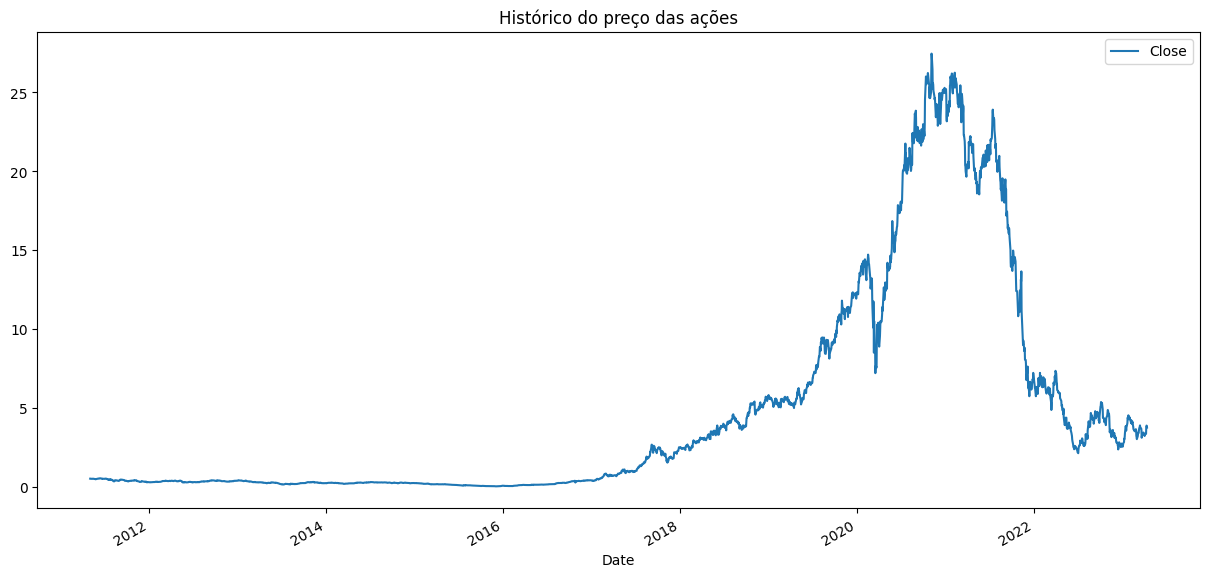

In [90]:
# GRÁFICO DE LINHAS: crescimento da empresa MAGALU
acao_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações'); 

In [91]:
# BASE DE DADOS COM MAIS AÇÕES - comparativo com o índice IBOVESPA

# BOVA11: https://www.sunoresearch.com.br/artigos/bova11/

# seleciona as ações (o BOVA11 é usado como comparativo as demais)
acoes = ['NUBR33.SA', 'TSLA', 'AMZN', 'MGLU3.SA', 'BOVA11.SA']

# busca os dados das ações (somente o "Close")
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = pdr.get_data_yahoo(acao, start = '2023-01-01', end = '2023-04-15')['Close']

# exibe as datas e as ações
print(acoes_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            NUBR33.SA        TSLA        AMZN  MGLU3.SA   BOVA11.SA
Date                                                               
2023-01-02       3.39         NaN         NaN      2.59  102.629997
2023-01-03       3.18  108.099998   85.820000      2.54  100.480003
2023-01-04       3.13  113.639999   85.139999      2.55  101.919998
2023-01-05       3.09  110.339996   83.120003      2.66  104.269997
2023-01-06       3.05  113.059998   86.080002      2.76  105.500000
...               ...         ...         ...       ...         ...
2023-04-10       3.73  184.509995  102.169998      3.35   98.660004
2023-04-11       3.77  186.789993   99.9199

In [92]:
# renomeia as colunas do dataframe
acoes_df = acoes_df.rename(columns = {'NUBR33.SA': 'NU', 'TSLA': 'TESLA', 'AMZN': 'AMAZON', 'MGLU3.SA': 'MAGALU', 'BOVA11.SA': 'BOVA'})

# exibe os novos valores do cabeçalho
print(acoes_df.head())     

              NU       TESLA     AMAZON  MAGALU        BOVA
Date                                                       
2023-01-02  3.39         NaN        NaN    2.59  102.629997
2023-01-03  3.18  108.099998  85.820000    2.54  100.480003
2023-01-04  3.13  113.639999  85.139999    2.55  101.919998
2023-01-05  3.09  110.339996  83.120003    2.66  104.269997
2023-01-06  3.05  113.059998  86.080002    2.76  105.500000


In [93]:
# verifica se há valores nulos
print(acoes_df.isnull().sum())

NU        0
TESLA     2
AMAZON    2
MAGALU    0
BOVA      0
dtype: int64


In [94]:
# exclui os registros nulos
print(acoes_df.dropna(inplace = True))    

None


In [95]:
# mostra o total de registros
print(acoes_df.shape)     

(70, 5)


In [96]:
# retorna o nome de todas as colunas
print(acoes_df.columns[1:])   

Index(['TESLA', 'AMAZON', 'MAGALU', 'BOVA'], dtype='object')


In [97]:
# visualiza algumas estatísticas prontas
print(acoes_df.describe())     

              NU       TESLA      AMAZON     MAGALU        BOVA
count  70.000000   70.000000   70.000000  70.000000   70.000000
mean    3.800571  175.693210   97.282429   3.617286  103.125429
std     0.404389   29.849176    5.117356   0.471421    4.130566
min     3.050000  108.099998   83.120003   2.540000   94.580002
25%     3.600000  168.225002   94.392502   3.310000   99.820000
50%     3.845000  185.709999   97.770000   3.630000  103.075001
75%     4.130000  195.152500  100.595001   3.890000  106.329998
max     4.620000  214.240005  112.910004   4.530000  110.650002


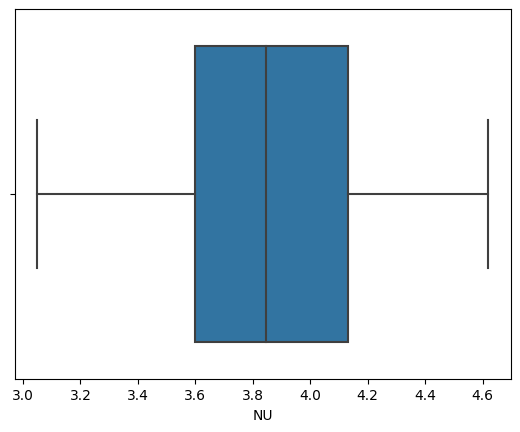

In [98]:
# BOXPLOT: valores min e máx de uma ação

# busca as ações do NUBANK
sns.boxplot(x = acoes_df['NU']); 
# os pontos a direita são os outliers
# as divisões do retângulo (mediana) são: 1º quartil e 2º quartil

In [99]:
# converte o index 'Date' do dataframe em coluna
acoes_df.reset_index(inplace = True)
print(acoes_df.head())

        Date    NU       TESLA     AMAZON  MAGALU        BOVA
0 2023-01-03  3.18  108.099998  85.820000    2.54  100.480003
1 2023-01-04  3.13  113.639999  85.139999    2.55  101.919998
2 2023-01-05  3.09  110.339996  83.120003    2.66  104.269997
3 2023-01-06  3.05  113.059998  86.080002    2.76  105.500000
4 2023-01-09  3.21  119.769997  87.360001    2.83  105.349998


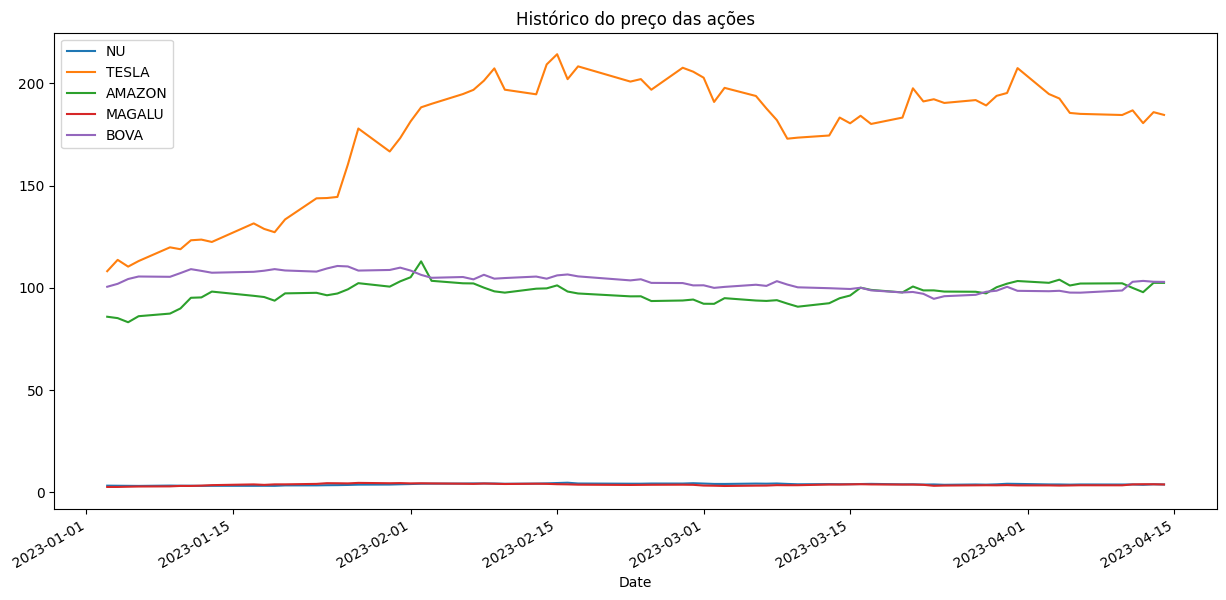

In [100]:
# GRÁFICO DE LINHAS: crescimento de cada empresa
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações'); # valores não normalizados

In [101]:
# seleciona somente as ações do NUBANK e MAGALU 
acoes_df = acoes_df[['Date', 'NU', 'MAGALU']]
print(acoes_df.head())

        Date    NU  MAGALU
0 2023-01-03  3.18    2.54
1 2023-01-04  3.13    2.55
2 2023-01-05  3.09    2.66
3 2023-01-06  3.05    2.76
4 2023-01-09  3.21    2.83


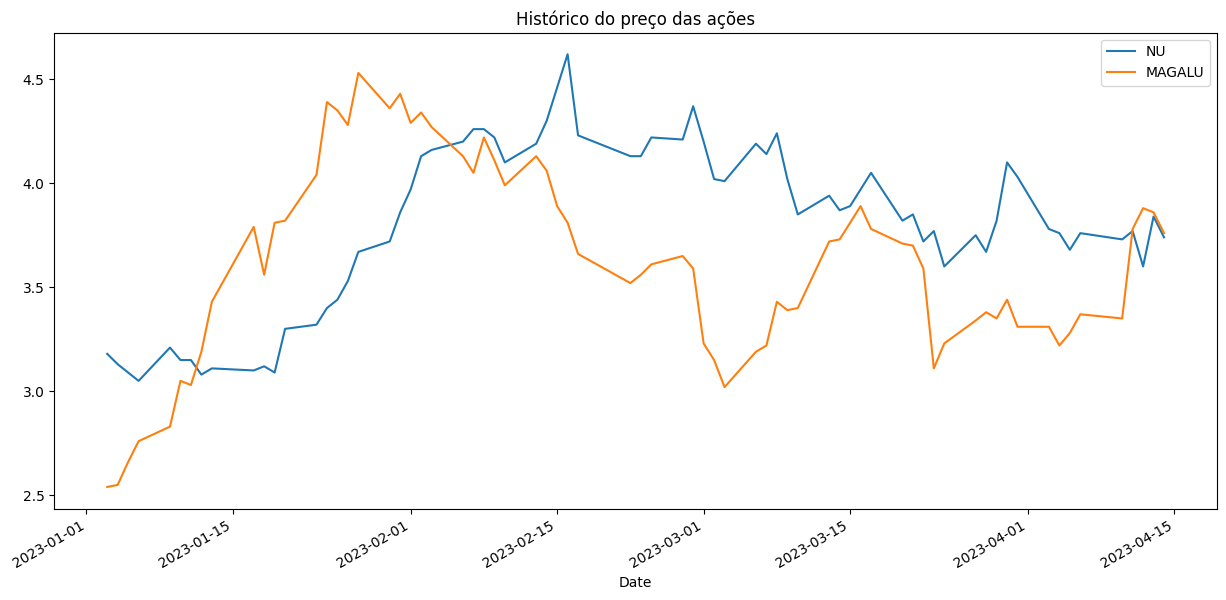

In [102]:
# gera um gráfico com as ações especificadas
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações'); 